## Calculating the orientation between MFG and coil direction

In [1]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

### First read in the direction of MFG

In [4]:
import pandas as pd

mfg_01 = pd.read_csv('/work/c-mfg-stud01-hash.csv') #student #1
mfg_01

,Unnamed: 0,x1,y1,z1,x2,y2,z2,id_hash
0,0,74,121,142,74,163,139,94c668d3941a0597c05d4277597c2460c5235d8b
1,1,73,112,164,73,161,152,001bda980325893f81559bd2805fd2ecee67abcd
2,2,73,124,187,73,175,177,1c8838b784ebd917dc8b7a84fa45e22d40f411f5
3,3,73,130,180,73,173,175,8874006084fe8e32904e6e83a54e098c965302a8
4,4,78,142,143,78,192,123,8960d6d7ab7eda524461283e44e70b889560e124
5,5,60,131,148,60,177,136,59c31c4832a97125923a86795ccb8f357c242318
6,6,54,170,209,54,206,188,a39b412ae04c99000f61e4c2c63ee6a49e5308ad
7,7,55,131,182,55,195,170,87061e4577c326359ab9db05e352b7b37e72eb99
8,8,54,166,206,54,212,180,f6463c25418b6773c9358c41d759cd3207f66bd7
9,9,56,128,111,56,199,88,51e5a2e2481e577ff5a491fa1e628adc8eb57c04


In [7]:
mfg_02 = pd.read_csv('/work/c-mfg-stud02-hash.csv') # student #2
mfg_02

,Unnamed: 0,x1,y1,z1,x2,y2,z2,id_hash
0,0,75,129,137,75,155,138,94c668d3941a0597c05d4277597c2460c5235d8b
1,1,74,133,163,74,157,152,001bda980325893f81559bd2805fd2ecee67abcd
2,2,72,136,185,72,165,175,1c8838b784ebd917dc8b7a84fa45e22d40f411f5
3,3,75,132,182,75,169,174,8874006084fe8e32904e6e83a54e098c965302a8
4,4,78,142,140,78,180,130,8960d6d7ab7eda524461283e44e70b889560e124
5,5,64,179,127,64,207,106,59c31c4832a97125923a86795ccb8f357c242318
6,6,55,170,207,55,199,190,a39b412ae04c99000f61e4c2c63ee6a49e5308ad
7,7,58,149,179,58,184,170,87061e4577c326359ab9db05e352b7b37e72eb99
8,8,55,167,202,55,204,185,f6463c25418b6773c9358c41d759cd3207f66bd7
9,9,58,143,105,58,186,93,51e5a2e2481e577ff5a491fa1e628adc8eb57c04


In [10]:
#checking the agreement between students
import numpy as np
for i in range(mfg_01.shape[0]):
    v1 = (mfg_01['x2'].iloc[i]-mfg_01['x1'].iloc[i], mfg_01['y2'].iloc[i]-mfg_01['y1'].iloc[i], mfg_01['z2'].iloc[i]-mfg_01['z1'].iloc[i])
    v2 = (mfg_02['x2'].iloc[i]-mfg_02['x1'].iloc[i], mfg_02['y2'].iloc[i]-mfg_02['y1'].iloc[i], mfg_02['z2'].iloc[i]-mfg_02['z1'].iloc[i])
    ang = np.rad2deg(angle_between(v1, v2))
    print(str(mfg_01['id_hash'].iloc[i]) + ': ' + str(ang))

94c668d3941a0597c05d4277597c2460c5235d8b: 6.2882149417407005
001bda980325893f81559bd2805fd2ecee67abcd: 10.86277967437239
1c8838b784ebd917dc8b7a84fa45e22d40f411f5: 7.93188302601085
8874006084fe8e32904e6e83a54e098c965302a8: 5.567954112242367
8960d6d7ab7eda524461283e44e70b889560e124: 7.057846649881054
59c31c4832a97125923a86795ccb8f357c242318: 22.24902365721237
a39b412ae04c99000f61e4c2c63ee6a49e5308ad: 0.12268884783759554
87061e4577c326359ab9db05e352b7b37e72eb99: 3.8011178513558526
f6463c25418b6773c9358c41d759cd3207f66bd7: 4.799025832908732
51e5a2e2481e577ff5a491fa1e628adc8eb57c04: 2.3565920536474683
ceadf0b82c1c64aa2c88de16bd10e467c2fc6359: 17.18958455615368
3b7434c4cc2e7db6beecd789fcd897884f4b9058: 5.532494391117554
af72ea4c54093ce7b3396f418c6218c4c3c4f946: 12.731182300368397
d90ccaf676390caff71219ed511524bf36e5fc64: 4.213134687291328
494001dd6c92a1776c10f46d034be21222b8babb: 4.236394799058677
0da133e9dcc29cb523df7320430261782234bdd0: 3.3773713741358358
442f6f7ff72677cb13d0213100b9cbcc35

### Seocnd read in the orientation file from the coil file...

In [11]:
# this id did not have Localite recordings saved: '0da133e9dcc29cb523df7320430261782234bdd0'

import json

biglist_01 = []
for i in range(mfg_01.shape[0]):
#for i in range(3):    
    ptid = mfg_01.id_hash[i]
    if (ptid!='0da133e9dcc29cb523df7320430261782234bdd0'):
        temp = mfg_01.iloc[np.where(mfg_01['id_hash']== ptid)]
        #temp.columns
        mfg = np.array([temp.x2-temp.x1, temp.y2-temp.y1, temp.z2-temp.z1]).flatten()


        #str(ptid).rjust(2, '0')
        coilloc = pd.read_csv('/work/HASH/location_' + ptid + '.csv', header=None)
        loa = [] #list of angles
        for j in range(coilloc.shape[0]):
            coil = np.array((-1)*coilloc[[1,5,9]].iloc[j]) #1,5,9 are py the y direction -1 is because it shows backwards
            loa.append(np.rad2deg(angle_between(mfg,coil)))
        print(i)
        biglist_01.append(loa)
        with open('/work/HASH/MFG-TMSCOIL-ORIENTATION-sub-' + ptid + '.json', 'w') as fout:
            json.dump(loa, fout)   

#with open('/work/MFG-TMSCOIL-ORIENTATION-ALL01-fin.json', 'w') as fout:
#    json.dump(biglist_01, fout)    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [12]:
import json
biglist_01 = []
for i in range(mfg_01.shape[0]):
    ptid = mfg_01.id_hash[i]
    if (ptid!='0da133e9dcc29cb523df7320430261782234bdd0'):
        f = open('/work/HASH/MFG-TMSCOIL-ORIENTATION-sub-' + ptid + '.json')
        list01 = json.load(f)
        f.close()
        biglist_01.append(list01)
with open('/work/HASH/MFG-TMSCOIL-ORIENTATION-ALL01-fin.json', 'w') as fout:
    json.dump(biglist_01, fout) 

<Axes: ylabel='Count'>

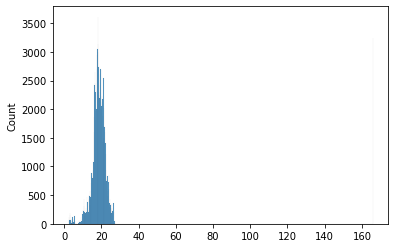

In [13]:
#an example of the orientation
import seaborn as sns
sns.histplot(biglist_01[38])

In [16]:
mymed=pd.DataFrame(index=range(mfg_01.shape[0]),columns=range(2))
mymed.columns=['ptid','median']
#mymed
m=0
for i in range(mfg_01.shape[0]):
#for i in range(3):    
    ptid = mfg_01.id_hash[i]
    if (ptid!='0da133e9dcc29cb523df7320430261782234bdd0'):
        mymed['median'].loc[i]=np.median(biglist_01[m])
        mymed['ptid'].loc[i]=ptid
        m=m+1
    else:
        mymed['ptid'].loc[i]='0da133e9dcc29cb523df7320430261782234bdd0'

In [17]:
mymed

,ptid,median
0,94c668d3941a0597c05d4277597c2460c5235d8b,23.122738
1,001bda980325893f81559bd2805fd2ecee67abcd,21.047006
2,1c8838b784ebd917dc8b7a84fa45e22d40f411f5,27.488372
3,8874006084fe8e32904e6e83a54e098c965302a8,18.066763
4,8960d6d7ab7eda524461283e44e70b889560e124,22.51398
5,59c31c4832a97125923a86795ccb8f357c242318,20.446817
6,a39b412ae04c99000f61e4c2c63ee6a49e5308ad,27.461884
7,87061e4577c326359ab9db05e352b7b37e72eb99,15.696928
8,f6463c25418b6773c9358c41d759cd3207f66bd7,17.251203
9,51e5a2e2481e577ff5a491fa1e628adc8eb57c04,23.032458


In [18]:
biglist_02 = []
for i in range(mfg_02.shape[0]):
#for i in range(3):    
    ptid = mfg_02.id_hash[i]
    if (ptid!='0da133e9dcc29cb523df7320430261782234bdd0'):
        temp = mfg_02.iloc[np.where(mfg_02['id_hash']== ptid)]
        #temp.columns
        mfg = np.array([temp.x2-temp.x1, temp.y2-temp.y1, temp.z2-temp.z1]).flatten()


        #str(ptid).rjust(2, '0')
        coilloc = pd.read_csv('/work/HASH/location_' + ptid + '.csv', header=None)
        loa = [] #list of angles
        for j in range(coilloc.shape[0]):
            coil = np.array((-1)*coilloc[[1,5,9]].iloc[j]) #1,5,9 are py the y direction -1 is because it shows backwards
            loa.append(np.rad2deg(angle_between(mfg,coil)))
        print(i)
        biglist_02.append(loa)
        with open('/work/HASH/MFG-STD02-TMSCOIL-ORIENTATION-sub-' + ptid + '.json', 'w') as fout:
            json.dump(loa, fout)   

#with open('/work/MFG-TMSCOIL-ORIENTATION-ALL02.json', 'w') as fout:
#    json.dump(biglist_02, fout)    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [20]:
import json
biglist_02 = []
for i in range(mfg_02.shape[0]):
    ptid = mfg_02.id_hash[i]
    if (ptid!='0da133e9dcc29cb523df7320430261782234bdd0'):
        f = open('/work/HASH/MFG-STD02-TMSCOIL-ORIENTATION-sub-' + ptid + '.json')
        list01 = json.load(f)
        f.close()
        biglist_02.append(list01)
with open('/work/HASH/MFG-TMSCOIL-ORIENTATION-ALL02-fin.json', 'w') as fout:
    json.dump(biglist_02, fout)

In [21]:
import json

f = open('/work/HASH/MFG-TMSCOIL-ORIENTATION-ALL02-fin.json')
biglist_02 = json.load(f)
f.close()

In [22]:
mymed2=pd.DataFrame(index=range(mfg_02.shape[0]),columns=range(2))
mymed2.columns=['ptid','median']
#mymed
m=0
for i in range(mfg_02.shape[0]):
#for i in range(3):    
    ptid = mfg_02.id_hash[i]
    if (ptid!='0da133e9dcc29cb523df7320430261782234bdd0'):
        mymed2['median'].loc[i]=np.median(biglist_02[m])
        mymed2['ptid'].loc[i]=ptid
        m=m+1
    else:
        mymed2['ptid'].loc[i]='0da133e9dcc29cb523df7320430261782234bdd0'


In [23]:
mymed2

,ptid,median
0,94c668d3941a0597c05d4277597c2460c5235d8b,26.572728
1,001bda980325893f81559bd2805fd2ecee67abcd,28.911154
2,1c8838b784ebd917dc8b7a84fa45e22d40f411f5,31.154836
3,8874006084fe8e32904e6e83a54e098c965302a8,17.102571
4,8960d6d7ab7eda524461283e44e70b889560e124,20.352977
5,59c31c4832a97125923a86795ccb8f357c242318,35.428187
6,a39b412ae04c99000f61e4c2c63ee6a49e5308ad,27.563841
7,87061e4577c326359ab9db05e352b7b37e72eb99,18.016642
8,f6463c25418b6773c9358c41d759cd3207f66bd7,15.05505
9,51e5a2e2481e577ff5a491fa1e628adc8eb57c04,21.917976


In [28]:
angles=mymed.merge(mymed2, on='ptid')
angles['medianp'] = (angles['median_x'] + angles['median_y'])/2
angles.to_csv('/src/notebooks/TMS/Angles-rTMS10Hz-hash.csv')

In [171]:
angles = pd.read_csv('/src/notebooks/TMS/Angles-rTMS10Hz-hash.csv')
distance = pd.read_csv('/src/notebooks/TMS/Distance-rTMS10Hz-hash.csv')
distance_ind = pd.read_csv('/src/notebooks/TMS/IND-Distance-rTMS10Hz-hash.csv')
distance_ind.columns=['_','distind','id_hash']

clinical = pd.read_csv('/src/notebooks/TMS/clin-slope-rTMS10Hz-hash.csv')

alldata = clinical.merge(distance, on='id_hash').merge(angles, left_on='id_hash', right_on='ptid').drop(columns=['ptid', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'])

In [146]:
alldata

,id_hash,sbj,slope,intercept,dist,median_x,median_y,medianp
0,94c668d3941a0597c05d4277597c2460c5235d8b,26,-0.839283,33.266023,8.084501,23.122738,26.572728,24.847733
1,001bda980325893f81559bd2805fd2ecee67abcd,0,-0.966511,34.557744,23.633079,21.047006,28.911154,24.979080
2,1c8838b784ebd917dc8b7a84fa45e22d40f411f5,7,-1.050411,29.553874,22.479815,27.488372,31.154836,29.321604
3,8874006084fe8e32904e6e83a54e098c965302a8,23,-0.642367,30.081287,21.449725,18.066763,17.102571,17.584667
4,8960d6d7ab7eda524461283e44e70b889560e124,24,-1.318720,24.001381,5.746111,22.513980,20.352977,21.433478
5,59c31c4832a97125923a86795ccb8f357c242318,17,-0.580564,27.164155,17.743540,20.446817,35.428187,27.937502
6,a39b412ae04c99000f61e4c2c63ee6a49e5308ad,27,-1.400732,26.458257,25.046627,27.461884,27.563841,27.512863
7,87061e4577c326359ab9db05e352b7b37e72eb99,22,-1.554605,20.472136,9.692665,15.696928,18.016642,16.856785
8,f6463c25418b6773c9358c41d759cd3207f66bd7,40,-2.334261,23.803509,18.061072,17.251203,15.055050,16.153127
9,51e5a2e2481e577ff5a491fa1e628adc8eb57c04,15,-2.010809,22.303433,4.211994,23.032458,21.917976,22.475217


In [106]:
negcorr = pd.read_csv('/src/notebooks/TMS/SGC-DLPC-corr-PA-small-rTMS10hz-hash.csv') #this is the correct one
negcorr.columns=['_','SGC_DLPFC_corr','median','id_hash']
negcorr

,_,SGC_DLPFC_corr,median,id_hash
0,3,0.448053,0.485332,59c31c4832a97125923a86795ccb8f357c242318
1,7,0.114765,0.115970,87061e4577c326359ab9db05e352b7b37e72eb99
2,11,-0.082023,-0.064883,a39b412ae04c99000f61e4c2c63ee6a49e5308ad
3,15,-0.110033,-0.104348,f6463c25418b6773c9358c41d759cd3207f66bd7
4,19,-0.268641,-0.268370,51e5a2e2481e577ff5a491fa1e628adc8eb57c04
5,23,-0.146895,-0.138407,ceadf0b82c1c64aa2c88de16bd10e467c2fc6359
6,27,-0.341714,-0.379038,3b7434c4cc2e7db6beecd789fcd897884f4b9058
7,31,0.145658,0.170925,d90ccaf676390caff71219ed511524bf36e5fc64
8,35,0.220102,0.218483,af72ea4c54093ce7b3396f418c6218c4c3c4f946
9,39,-0.342898,-0.343871,494001dd6c92a1776c10f46d034be21222b8babb


In [172]:
alldata2=alldata.merge(negcorr[['SGC_DLPFC_corr','id_hash']], on='id_hash').merge(distance_ind,on='id_hash').drop(columns=['_'])
alldata2

,id_hash,sbj,slope,intercept,dist,median_x,median_y,medianp,SGC_DLPFC_corr,distind
0,59c31c4832a97125923a86795ccb8f357c242318,17,-0.580564,27.164155,17.743540,20.446817,35.428187,27.937502,0.448053,21.332081
1,a39b412ae04c99000f61e4c2c63ee6a49e5308ad,27,-1.400732,26.458257,25.046627,27.461884,27.563841,27.512863,-0.082023,51.703817
2,87061e4577c326359ab9db05e352b7b37e72eb99,22,-1.554605,20.472136,9.692665,15.696928,18.016642,16.856785,0.114765,44.614620
3,f6463c25418b6773c9358c41d759cd3207f66bd7,40,-2.334261,23.803509,18.061072,17.251203,15.055050,16.153127,-0.110033,26.360767
4,51e5a2e2481e577ff5a491fa1e628adc8eb57c04,15,-2.010809,22.303433,4.211994,23.032458,21.917976,22.475217,-0.268641,21.914413
5,ceadf0b82c1c64aa2c88de16bd10e467c2fc6359,34,-1.595205,21.627262,12.757861,16.220975,28.085640,22.153308,-0.146895,18.376420
6,3b7434c4cc2e7db6beecd789fcd897884f4b9058,11,-1.235328,19.843587,9.031569,14.393549,16.647411,15.520480,-0.341714,30.671867
7,af72ea4c54093ce7b3396f418c6218c4c3c4f946,30,-1.283102,26.008937,21.286766,15.221096,18.090344,16.655720,0.220102,30.455274
8,d90ccaf676390caff71219ed511524bf36e5fc64,35,-1.106621,29.850011,7.984179,12.974567,9.528056,11.251311,0.145658,30.924651
9,494001dd6c92a1776c10f46d034be21222b8babb,13,-2.626024,24.330638,17.076283,27.758244,31.221184,29.489714,-0.342898,5.680381


/opt/conda/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='SGC_DLPFC_corr', ylabel='medianp'>

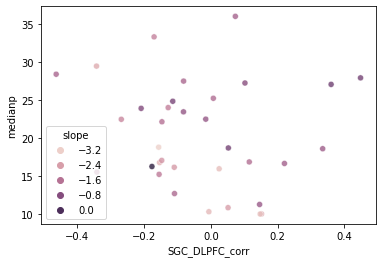

In [111]:
sns.scatterplot(data=alldata2, y= 'medianp', x='SGC_DLPFC_corr',alpha = .8, hue='slope', cmap = 'seismic')

In [182]:
import statsmodels.formula.api as smf 
est = smf.ols(formula='slope ~ medianp + distind', data=alldata2).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  slope   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2.635
Date:                Sat, 23 Dec 2023   Prob (F-statistic):             0.0877
Time:                        07:08:20   Log-Likelihood:                -39.998
No. Observations:                  34   AIC:                             86.00
Df Residuals:                      31   BIC:                             90.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8257      0.554     -5.103      0.000      -3.955      -1.696
medianp        0.0449      0.021      2.151      0.039       0.002       0.088
distind        0.0100      0.010      1.032      0.310      -0.010       0.030
==============================================================================
Omnibus:                        5.543   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.061
Skew:                           0.639   Prob(JB):                        0.131
Kurtosis:                       4.111   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
est = smf.ols(formula='slope ~ medianp + SGC_DLPFC_corr', data=alldata2).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  slope   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     3.162
Date:                Sat, 23 Dec 2023   Prob (F-statistic):             0.0563
Time:                        07:08:30   Log-Likelihood:                -39.511
No. Observations:                  34   AIC:                             85.02
Df Residuals:                      31   BIC:                             89.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.5293      0.441     -5.738      0.000      -3.428      -1.630
medianp            0.0463      0.021      2.243      0.032       0.004       0.088
SGC_DLPFC_corr     0.9893      0.700      1.413      0.168      -0.438       2.417
==============================================================================
Omnibus:                        4.584   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                3.113
Skew:                           0.564   Prob(JB):                        0.211
Kurtosis:                       3.962   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

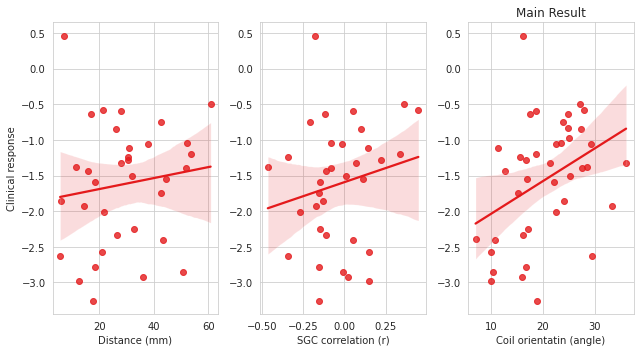

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
sns.set_palette("Set1")
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(9, 5))
plt.title('Main Result')

# Panel A
sns.regplot(data=alldata2, y= 'slope', x='distind', ax = axes[0])
axes[0].set_title('')

#Panel B
sns.regplot(data=alldata2, y= 'slope', x='SGC_DLPFC_corr', ax = axes[1])
axes[0].set_title('')

# Panel C
sns.regplot(data=alldata, y= 'slope', x='medianp', ax = axes[2])
axes[1].set_title('')

# Remove redundant subplot labels
axes[0].set_ylabel('Clinical response')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_xlabel('Distance (mm)')
axes[1].set_xlabel('SGC correlation (r)')
axes[2].set_xlabel('Coil orientatin (angle)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [184]:
import scipy.stats
scipy.stats.pearsonr(alldata['slope'], alldata['medianp'])

(0.37990198339010117, 0.01560826060005512)

In [192]:
scipy.stats.pearsonr(alldata2['slope'], alldata2['SGC_DLPFC_corr'])

(0.1862212125620099, 0.2916584728022714)

In [190]:
scipy.stats.pearsonr(alldata2['slope'], alldata2['distind'])

(0.13329120087105198, 0.4523479817764827)

In [131]:
scipy.stats.pearsonr(alldata2['SGC_DLPFC_corr'], alldata2['dist'])

(0.2267514795909709, 0.19719087569135935)

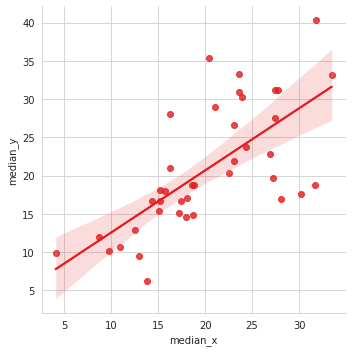

In [123]:
sns.lmplot(data=alldata, x= 'median_x', y='median_y')

In [126]:
scipy.stats.pearsonr(alldata['median_x'], alldata['median_y'])

(0.6897444504568675, 8.521289616125136e-07)

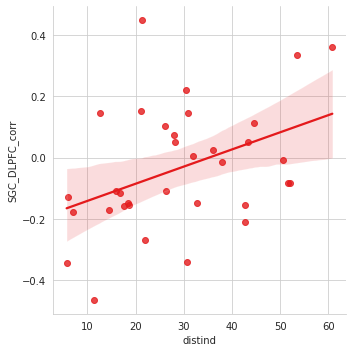

In [175]:
sns.lmplot(data=alldata2, x= 'distind', y='SGC_DLPFC_corr') #as expected the closer to the peak the more negative the correlation